# Title of the Notebook
A brief introduction to the notebook's purpose and contents.

## Table of Contents
- [Introduction](#Introduction)
- [Data Exploration](#Data-Exploration)
- [Analysis](#Analysis)
- [Conclusion](#Conclusion)

## Introduction
Explain the context and the problem you are solving with the notebook. This could include:
- What the notebook aims to achieve.
- A brief overview of the dataset (if applicable).
- Expected outcomes or objectives.

## Data Exploration
Provide an overview of your dataset, including:
- A description of the data's source.
- A preview of important columns or features.
- Initial data cleaning steps.

### Data Summary
Present some key statistics or visualizations that give an insight into the data.

## Analysis
Detail the methods or algorithms used in your analysis. You can break this section into smaller subsections for clarity:
- [Method 1](#Method-1)
- [Method 2](#Method-2)

### Method 1
Explain the first method of analysis or modeling and include results (if any).

### Method 2
Explain the second method and any insights it brings.

## Results
Summarize the main findings from your analysis. Use bullet points or a concise explanation to showcase results.

## Conclusion
Provide a final summary of your findings, challenges encountered, and potential next steps.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [9]:
# Fire data
fires = pd.read_csv('FIRMS_USA_2018.csv')

# Drought data
drought = pd.read_csv('dm_2018.csv')

# AQI data
aqi = pd.read_csv('daily_aqi_by_county_2018.csv')


In [10]:
fires.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,33.4856,-90.2127,319.4,1.4,1.2,2018-01-01,427,Terra,MODIS,98,6.03,267.5,38.3,N,0
1,44.3762,-119.1190,312.5,1.2,1.1,2018-01-01,608,Terra,MODIS,85,6.03,269.1,21.9,N,0
2,19.3431,-155.0508,309.8,4.0,1.9,2018-01-01,919,Terra,MODIS,68,6.03,289.9,82.0,N,1
3,19.3475,-155.0585,308.8,4.0,1.9,2018-01-01,919,Terra,MODIS,63,6.03,289.1,76.1,N,1
4,19.3805,-155.0684,310.2,4.0,1.9,2018-01-01,919,Terra,MODIS,70,6.03,287.3,83.6,N,1


In [11]:
drought.head()

,MapDate,AreaOfInterest,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20181225,Total,70.52,29.48,19.18,9.51,2.80,0.96,2018-12-25,2018-12-31,1
1,20181218,Total,71.23,28.77,19.37,9.69,3.11,0.96,2018-12-18,2018-12-24,1
2,20181211,Total,71.52,28.48,19.34,9.69,3.14,0.98,2018-12-11,2018-12-17,1
3,20181204,Total,71.76,28.24,18.91,9.81,3.17,0.98,2018-12-04,2018-12-10,1
4,20181127,Total,70.60,29.40,19.48,9.88,3.57,1.10,2018-11-27,2018-12-03,1


In [12]:
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


## Dataset Analysis


In [17]:
# Fires dataset
fires['acq_date'] = pd.to_datetime(fires['acq_date'])
fires['month'] = fires['acq_date'].dt.month

# Drought dataset
# Rename 'None' column
drought.rename(columns={'None': 'None_pct'}, inplace=True)

# Convert 'ValidStart' to datetime and extract month
drought['ValidStart'] = pd.to_datetime(drought['ValidStart'])
drought['month'] = drought['ValidStart'].dt.month

# Convert necessary columns to numeric
numeric_columns = ['None_pct', 'D0', 'D1', 'D2', 'D3', 'D4', 'StatisticFormatID']
for col in numeric_columns:
    drought[col] = pd.to_numeric(drought[col], errors='coerce')

# AQI dataset
aqi['Date'] = pd.to_datetime(aqi['Date'])
aqi['month'] = aqi['Date'].dt.month

### Aggregate Data Monthly for Analysis

In [18]:
# 3. Aggregate Data Monthly for Analysis

# Fires: Count of fires per month
fires_monthly = fires.groupby('month').size().reset_index(name='fire_count')

# Drought: Average drought levels per month
drought_monthly = drought.groupby('month')[numeric_columns].mean().reset_index()

# AQI: Average AQI per month
aqi_monthly = aqi.groupby('month')['AQI'].mean().reset_index()

### Merge the Datasets

In [19]:


# Merge on 'month'
data = fires_monthly.merge(drought_monthly, on='month')
data = data.merge(aqi_monthly, on='month')

## Exploratory Data Analysis

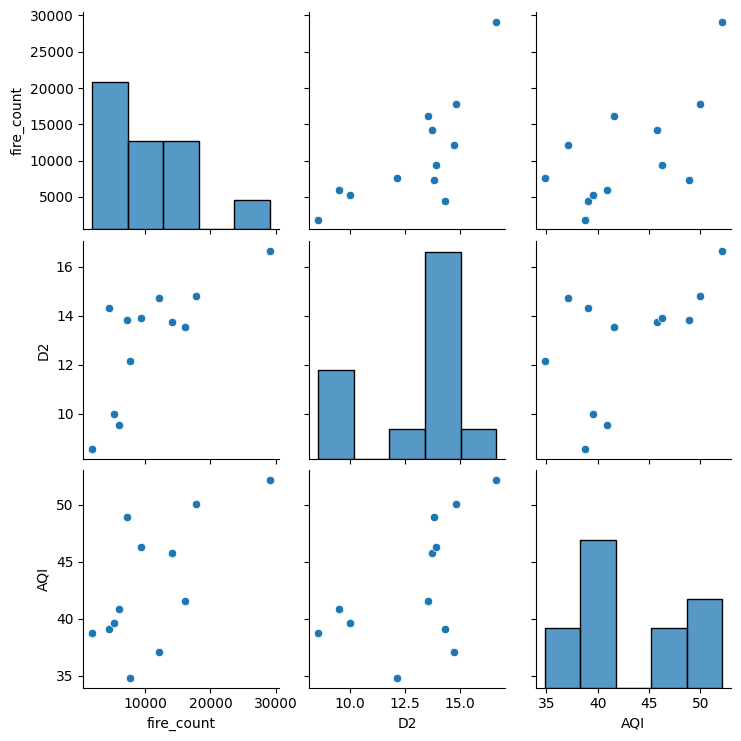

In [20]:
# 5. Exploratory Data Analysis

# Visualize relationships between variables
sns.pairplot(data[['fire_count', 'D2', 'AQI']])
plt.show()

## Correlation Analysis

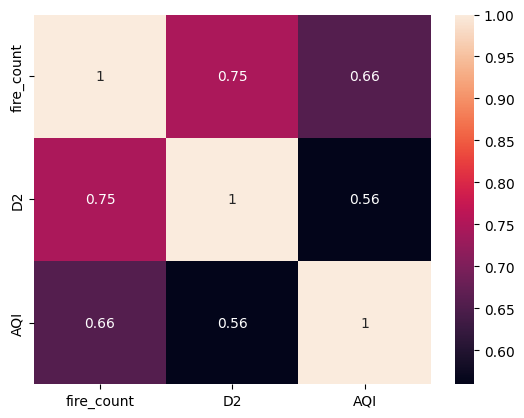

In [21]:
# 6. Correlation Analysis

corr_matrix = data[['fire_count', 'D2', 'AQI']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##  Prepare Data for Modeling

In [22]:
# 7. Prepare Data for Modeling

# Define features and target variables
X = data[['D2', 'AQI']]
y = data['fire_count']

### Standardize features

In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data

In [24]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

##  K-Nearest Neighbors Regression

### Initialize model

In [25]:

knn = KNeighborsRegressor(n_neighbors=3)

### Train model

In [26]:

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Predict

In [27]:

y_pred = knn.predict(X_test)


### Evaluate

In [28]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'KNN RMSE: {rmse}')

KNN RMSE: 3607.7312302373125


### import

In [30]:
from sklearn.linear_model import LinearRegression

## Linear Regression Model

### Initialize model

In [31]:



lr = LinearRegression()


### Train model

In [32]:

lr.fit(X_train, y_train)

LinearRegression()

### Predict

In [33]:

y_pred_lr = lr.predict(X_test)

### Evaluate

In [34]:

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 3489.2958994568385



### Check coefficients to understand the impact of each factor

In [35]:

coefficients = pd.DataFrame({
    'Feature': ['D2', 'AQI'],
    'Coefficient': lr.coef_
})
print(coefficients)

  Feature  Coefficient
0      D2  4697.499811
1     AQI  2839.865636


### Merge datasets on 'month'

In [37]:

data = fires_monthly.merge(drought_monthly, on='month')
data = data.merge(aqi_monthly, on='month')


### Plotting

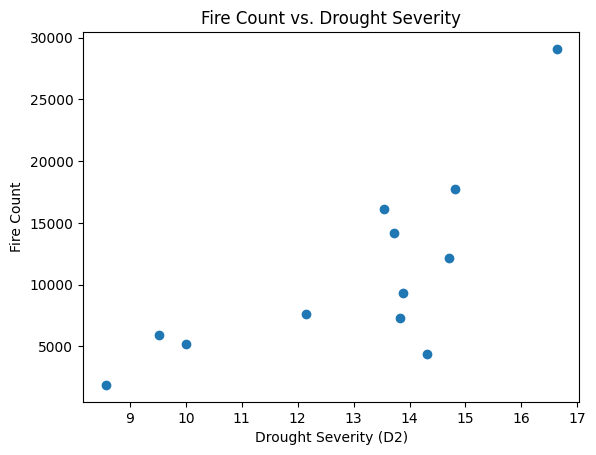

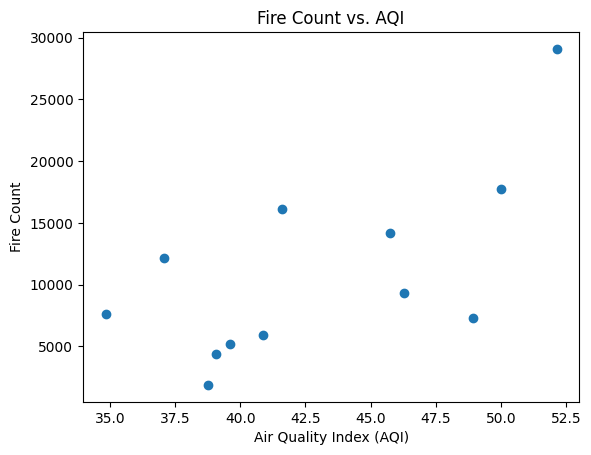

In [38]:
# Plotting fire count vs. drought severity (D2)
plt.scatter(data['D2'], data['fire_count'])
plt.xlabel('Drought Severity (D2)')
plt.ylabel('Fire Count')
plt.title('Fire Count vs. Drought Severity')
plt.show()

# Plotting fire count vs. AQI
plt.scatter(data['AQI'], data['fire_count'])
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Fire Count')
plt.title('Fire Count vs. AQI')
plt.show()


### Calculation

In [39]:
# Calculate monthly change in D2
data['D2_change'] = data['D2'].diff().fillna(0)

# Estimate average drought increase rate
drought_increase_rate = data['D2_change'].mean()
print(f'Drought Increase Rate: {drought_increase_rate}')


Drought Increase Rate: -0.07983333333333335


In [40]:
# Linear regression to find the relationship between D2 and fire count
from sklearn.linear_model import LinearRegression

X = data[['D2']]
y = data['fire_count']

model = LinearRegression()
model.fit(X, y)

wildfire_generation_rate = model.coef_[0]
print(f'Wildfire Generation Rate: {wildfire_generation_rate}')


Wildfire Generation Rate: 2315.843923941694


In [41]:
# Linear regression to find the relationship between fire count and AQI
X_aqi = data[['fire_count']]
y_aqi = data['AQI']

model_aqi = LinearRegression()
model_aqi.fit(X_aqi, y_aqi)

aqi_per_wildfire = model_aqi.coef_[0]
print(f'AQI Increase per Wildfire: {aqi_per_wildfire}')


AQI Increase per Wildfire: 0.0004842787036611404


In [42]:
!pip install simpy

In [43]:

import simpy


In [49]:
!pip install bptk-py


In [47]:
!pip install networkx pysd


  Using cached mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.1 MB/s eta 0:00:00a 0:00:01
Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=137319 sha256=2f391b196d6ad7ce83c0ec93ab7b7229cc7dd9f627dc3644437a9ca04e4ad0c1
  Stored in directory: /Users/ruwadnaswan/Library/Caches/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


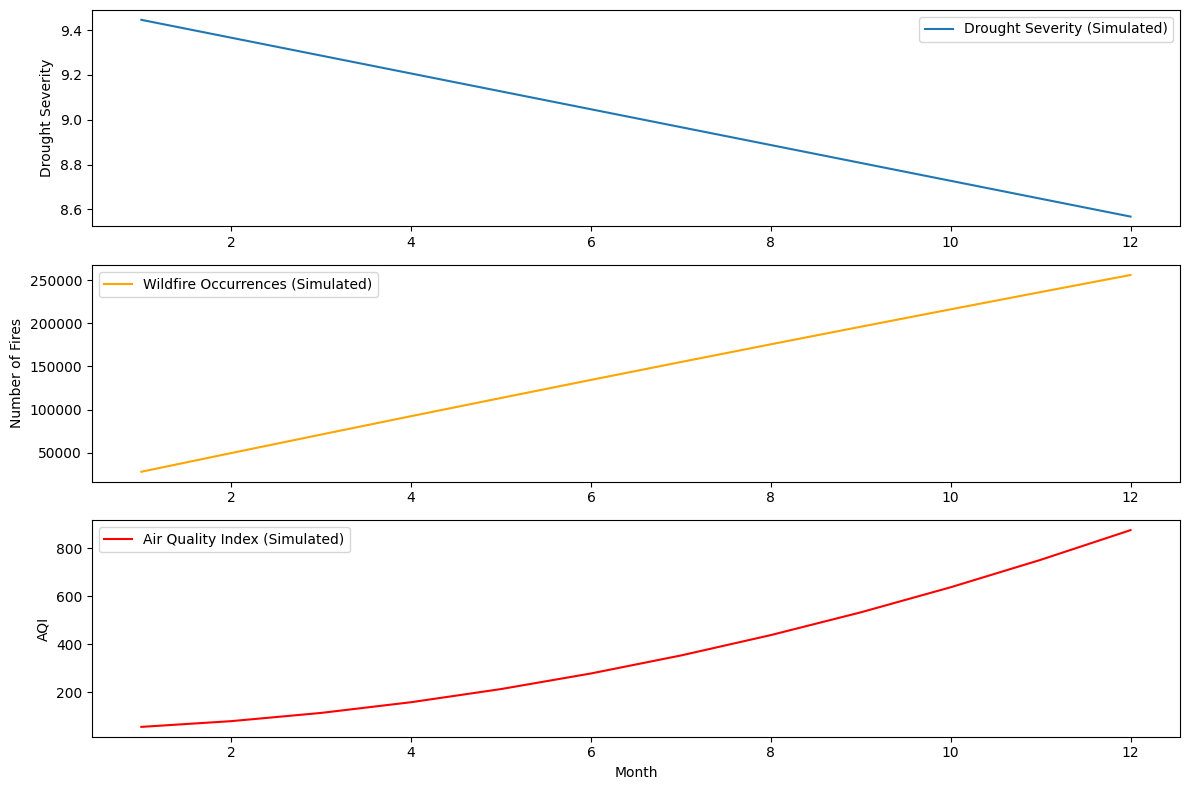

In [51]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt

# Initialize environment
env = simpy.Environment()

# Initialize data structures
drought_severity = []
wildfire_occurrences = []
aqi_levels = []

# Parameters (Using estimated parameters)
initial_drought_level = data['D2'].iloc[0]  # Starting drought severity
drought_increase_rate = drought_increase_rate  # From your earlier estimation
wildfire_generation_rate = wildfire_generation_rate  # From your earlier estimation
aqi_per_wildfire = aqi_per_wildfire  # From your earlier estimation

# Initial values
Drought_Severity = initial_drought_level
Wildfire_Occurrences = data['fire_count'].iloc[0]
Air_Quality_Index = data['AQI'].iloc[0]

def system_dynamics(env):
    global Drought_Severity, Wildfire_Occurrences, Air_Quality_Index
    while True:
        # Update Drought Severity
        Drought_Severity += drought_increase_rate

        # Update Wildfire Occurrences
        Wildfire_Occurrences += wildfire_generation_rate * Drought_Severity

        # Update AQI
        Air_Quality_Index += aqi_per_wildfire * Wildfire_Occurrences

        # Collect data
        drought_severity.append(Drought_Severity)
        wildfire_occurrences.append(Wildfire_Occurrences)
        aqi_levels.append(Air_Quality_Index)

        # Wait for next time step
        yield env.timeout(1)

# Run the simulation
env.process(system_dynamics(env))
env.run(until=12)

# Plotting the results
time_steps = range(1, 13)
plt.figure(figsize=(12, 8))

# Drought Severity
plt.subplot(3, 1, 1)
plt.plot(time_steps, drought_severity, label="Drought Severity (Simulated)")
plt.ylabel("Drought Severity")
plt.legend()

# Wildfire Occurrences
plt.subplot(3, 1, 2)
plt.plot(time_steps, wildfire_occurrences, label="Wildfire Occurrences (Simulated)", color="orange")
plt.ylabel("Number of Fires")
plt.legend()

# AQI Levels
plt.subplot(3, 1, 3)
plt.plot(time_steps, aqi_levels, label="Air Quality Index (Simulated)", color="red")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.legend()

plt.tight_layout()
plt.show()
